In [164]:
import pandas as pd

df = pd.read_csv('lungcapacity.csv')
#df = df.dropna(subset=['Height(inches)'])  # Drops rows where 'Height' has NaN


# use linear reg to predict lung capacity given height

print(df)

df = df.dropna()

x = df['Height(inches)'].values.reshape(-1, 1)
y = df['LungCap(cc)']


print(y)

     LungCap(cc)  Age( years)  Height(inches) Smoke  Gender Caesarean  \
0          6.475          6.0            62.1   NaN    male        no   
1         10.125         18.0            74.7   yes  female        no   
2          9.550         16.0            69.7    no  female       yes   
3         11.125         14.0            71.0    no    male        no   
4          4.800          5.0            56.9    no    male        no   
..           ...          ...             ...   ...     ...       ...   
741        9.925         16.0            68.3    no  female        no   
742        8.725         19.0            68.4    no  female        no   
743        7.075         11.0            66.7    no    male       yes   
744        8.825         16.0            71.3   yes  female        no   
745          NaN         17.0            68.8    no    male       yes   

     No of children  Weight (kg)  
0                 3        85.70  
1                 0        98.75  
2                 

In [165]:
import numpy as np
import pandas as pd

def knn(x, y, k):
    n = len(y)
    y_pred = np.zeros(n)  # Initialize predictions array

    for i in range(n):
        # Exclude the current point
        distances = np.abs(x[i] - np.delete(x, i))  # Calculate absolute differences
        neighbors = np.delete(y, i)  # Exclude current target value

        # Combine distances and neighbors into a DataFrame for sorting
        d = pd.DataFrame({'distances': distances, 'neighbors': neighbors})

        # Sort by distance
        d_sorted = d.sort_values(by='distances')

        # Select k nearest neighbors
        nearest_neighbors = d_sorted['neighbors'][:k]

        # Compute prediction as the mean of the k nearest neighbors
        y_pred[i] = nearest_neighbors.mean()

    return y_pred


In [166]:
# Apply KNN with k=3
k = 3
yhat = knn(x, y, k)

# Print predictions
print("Predictions:", yhat)



import numpy as np
import pandas as pd
def knn_regressor(x_train, y_train, x_test, k=3):
    """
    Custom KNN regressor.
    
    Parameters:
    - x_train: Training data inputs (1D array).
    - y_train: Training data targets (1D array).
    - x_test: Test data inputs (1D array).
    - k: Number of neighbors.
    
    Returns:
    - y_pred: Predicted target values for x_test.
    """
    # Convert y_train to NumPy array if it's not already
    y_train = np.array(y_train)
    y_pred = np.zeros(len(x_test))  # Initialize predictions array

    for i, x_query in enumerate(x_test):
        # Compute distances from x_query to all training points
        distances = np.abs(x_train - x_query)
        
        # Get indices of the k nearest neighbors
        neighbor_indices = np.argsort(distances)[:k]
        
        # Predict as the mean of the neighbors' target values
        y_pred[i] = y_train[neighbor_indices].mean()
    
    return y_pred


Predictions: [10.70833333  9.9         9.40833333  4.9         6.31666667  7.05833333
 10.625       9.525       6.54166667 12.775      10.55833333  5.43333333
  5.96666667  6.05833333  6.8         6.54166667  5.05833333  6.325
  9.21666667  3.75        9.79166667  8.325       8.03333333  6.05833333
  6.08333333  9.14166667  1.96666667  9.79166667  4.83333333  6.78333333
  8.56666667  8.44166667  8.2         8.4         3.475       7.91666667
  6.98333333 11.13333333  8.15833333  6.36666667  8.3         2.29166667
  7.53333333  8.11666667  6.78333333 12.11666667  7.91666667  8.21666667
 11.725       8.10833333  6.64166667 12.33333333  3.575       9.35833333
 11.225       4.85833333  8.28333333  4.45833333  8.86666667  5.95
  6.10833333  8.74166667  8.94166667  7.50833333  7.175       8.6
  9.9         1.92733333 10.50833333  7.78333333  7.81666667  8.61666667
  6.39166667  9.71666667  9.          7.51666667  9.58333333 10.98333333
 12.65        6.38333333  7.48333333 11.88333333  7.3916

KNN Predictions: [ 4.41666667 11.65       10.5         6.95        8.21666667  6.775
  7.03333333  9.45833333  8.35833333 11.71666667  7.89166667  8.18333333
  8.20833333  4.85833333 10.98333333  7.63333333  6.11666667  3.84166667
  7.89166667  6.11666667 11.69166667  6.94166667  5.325      11.34166667
 12.425       8.99166667  6.55833333 11.33333333  4.64166667  7.63333333
  7.50833333 11.65        8.20833333 10.85833333  9.35833333  7.39166667
  9.44166667  5.31666667 12.125       9.35833333 10.83333333  4.41666667
  1.9         5.88333333 11.71666667  9.24166667  4.48333333 10.65833333
 11.05833333 10.70833333  5.83333333  6.825      12.55833333  9.35833333
  3.69166667 12.425       4.41666667  9.775       7.70833333  3.15
  4.85833333  6.11666667  4.65        7.63333333  8.84166667  5.575
  8.09166667  8.58333333 10.59166667  9.45833333  6.55833333  8.475
  5.88333333  7.56666667  3.66666667  8.18333333  4.65        8.91666667
  4.85833333 11.69166667  5.88333333  7.63333333  8.583

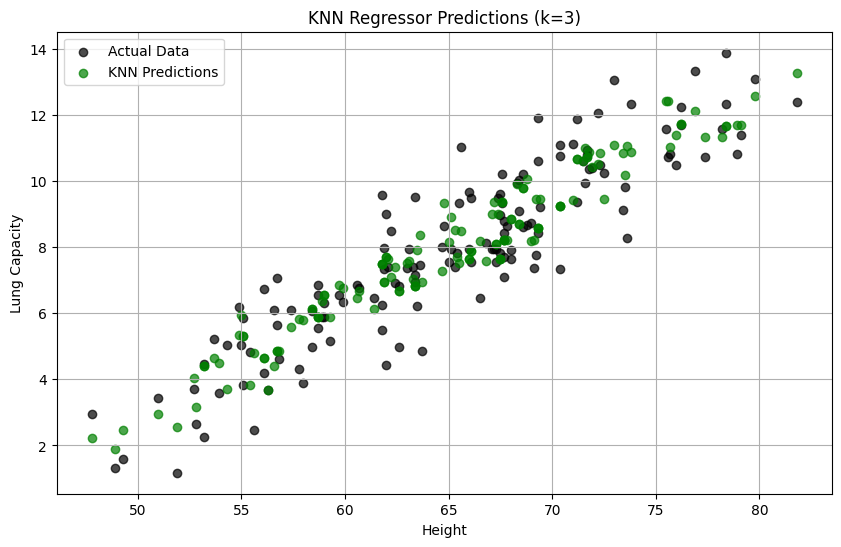

In [167]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


# Use the custom KNN Regressor for predictions
k = 3
y_pred_knn = knn_regressor(X_train.flatten(), y_train, X_test.flatten(), k)

# Evaluate Results
print("KNN Predictions:", y_pred_knn)

# Calculate Mean Squared Error (MSE)
mse_knn = mean_squared_error(y_test, y_pred_knn)

print("\nMean Squared Error:")
print(f"KNN MSE: {mse_knn:.3f}")

# Plot predictions
plt.figure(figsize=(10, 6))

# Scatter plot for actual data
plt.scatter(X_test, y_test, color='black', label='Actual Data', alpha=0.7)

# KNN predictions
plt.scatter(X_test, y_pred_knn, color='green', label='KNN Predictions', alpha=0.7)

# Plot settings
plt.title(f"KNN Regressor Predictions (k={k})")
plt.xlabel("Height")
plt.ylabel("Lung Capacity")
plt.legend()
plt.grid(True)
plt.show()
